<a href="https://colab.research.google.com/github/tafataghiles/Base-de-donn-es/blob/master/Lfinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [99]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import StratifiedShuffleSplit, StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
 
from sklearn.metrics import confusion_matrix, classification_report
 
 
 
from yellowbrick.classifier import ROCAUC, PrecisionRecallCurve, ClassificationReport
from yellowbrick.model_selection import LearningCurve, ValidationCurve, learning_curve
 
 
import warnings
warnings.filterwarnings(action="ignore")

In [2]:
#Chargé la base de données 
df = pd.read_excel ('/content/drive/MyDrive/PrLotfi.xlsx')

In [3]:
df 

,techno,surface m²,% surface,longueur m,% longueur,epaisseur,TOTAL,PIECE
0,CONTACT,4.07,0.1,7.22,0.1,4.0,7322.0,449.0
1,CONTACT,2.37,0.1,5.50,0.1,4.0,8897.0,315.0
2,CONTACT,0.05,0.1,1.15,0.1,3.0,1000.0,56.0
3,CONTACT,2.39,0.1,8.80,0.1,5.0,3437.0,544.0
4,CONTACT,1.44,0.1,6.70,0.1,3.5,3162.0,406.0
...,...,...,...,...,...,...,...,...
150,THERMO,0.55,0.1,3.67,0.1,4.0,7638.0,47.0
151,THERMO,0.20,0.1,3.04,0.1,4.0,5334.0,38.0
152,THERMO,0.16,0.1,2.18,0.1,4.0,3281.0,28.0
153,THERMO,0.90,0.1,5.20,0.1,4.0,7137.0,77.0


In [4]:
df.shape

(155, 8)

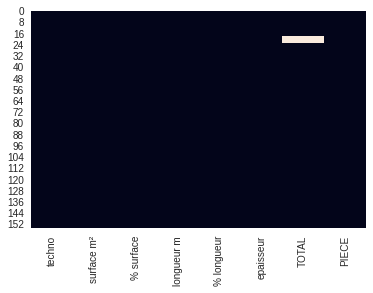

In [5]:
#Visulaiser les valeur manquantes sur l'image
sns.heatmap(df.isna(),cbar=False)

In [6]:
# les lignes dupliquées et la valeur manquante
print(df.duplicated().sum())
print(df.isnull().sum().sum())

4
5


In [7]:
#types de données de nos colonnes 
df.dtypes.sort_values()

surface m²    float64
% surface     float64
longueur m    float64
% longueur    float64
epaisseur     float64
TOTAL         float64
PIECE         float64
techno         object
dtype: object

In [8]:
df.describe()

,surface m²,% surface,longueur m,% longueur,epaisseur,TOTAL,PIECE
count,155.000000,1.550000e+02,155.000000,1.550000e+02,155.000000,150.000000,155.000000
mean,0.920658,1.000000e-01,6.035813,1.000000e-01,3.619355,8874.953333,148.392387
std,0.891291,2.645327e-16,4.749915,2.645327e-16,0.522494,12955.155576,281.425426
min,0.017000,1.000000e-01,0.760000,1.000000e-01,2.000000,660.000000,13.200000
25%,0.400000,1.000000e-01,3.200000,1.000000e-01,3.000000,3635.000000,37.680000
50%,0.650000,1.000000e-01,4.800000,1.000000e-01,4.000000,5776.500000,63.550000
75%,1.040000,1.000000e-01,7.350000,1.000000e-01,4.000000,9350.000000,168.500000
max,4.660000,1.000000e-01,37.520000,1.000000e-01,5.000000,119800.000000,2422.000000


In [9]:
# Renseigner les valeurs manquantes 
cat_data=[]
num_data=[]
for i,c in enumerate (df.dtypes):
  if c==object:
    cat_data.append(df.iloc[:,i])
  else:
    num_data.append(df.iloc[:,i])
num_data

[0      4.07
 1      2.37
 2      0.05
 3      2.39
 4      1.44
        ... 
 150    0.55
 151    0.20
 152    0.16
 153    0.90
 154    0.96
 Name: surface m², Length: 155, dtype: float64, 0      0.1
 1      0.1
 2      0.1
 3      0.1
 4      0.1
       ... 
 150    0.1
 151    0.1
 152    0.1
 153    0.1
 154    0.1
 Name: % surface, Length: 155, dtype: float64, 0      7.22
 1      5.50
 2      1.15
 3      8.80
 4      6.70
        ... 
 150    3.67
 151    3.04
 152    2.18
 153    5.20
 154    9.88
 Name: longueur m, Length: 155, dtype: float64, 0      0.1
 1      0.1
 2      0.1
 3      0.1
 4      0.1
       ... 
 150    0.1
 151    0.1
 152    0.1
 153    0.1
 154    0.1
 Name: % longueur, Length: 155, dtype: float64, 0      4.0
 1      4.0
 2      3.0
 3      5.0
 4      3.5
       ... 
 150    4.0
 151    4.0
 152    4.0
 153    4.0
 154    4.0
 Name: epaisseur, Length: 155, dtype: float64, 0      7322.0
 1      8897.0
 2      1000.0
 3      3437.0
 4      3162.0
         .

In [12]:
num_data
#Visulaiser les valeur manquantes sur l'image
#sns.heatmap(num_data.isna(),cbar=False)

[0      4.07
 1      2.37
 2      0.05
 3      2.39
 4      1.44
        ... 
 150    0.55
 151    0.20
 152    0.16
 153    0.90
 154    0.96
 Name: surface m², Length: 155, dtype: float64, 0      0.1
 1      0.1
 2      0.1
 3      0.1
 4      0.1
       ... 
 150    0.1
 151    0.1
 152    0.1
 153    0.1
 154    0.1
 Name: % surface, Length: 155, dtype: float64, 0      7.22
 1      5.50
 2      1.15
 3      8.80
 4      6.70
        ... 
 150    3.67
 151    3.04
 152    2.18
 153    5.20
 154    9.88
 Name: longueur m, Length: 155, dtype: float64, 0      0.1
 1      0.1
 2      0.1
 3      0.1
 4      0.1
       ... 
 150    0.1
 151    0.1
 152    0.1
 153    0.1
 154    0.1
 Name: % longueur, Length: 155, dtype: float64, 0      4.0
 1      4.0
 2      3.0
 3      5.0
 4      3.5
       ... 
 150    4.0
 151    4.0
 152    4.0
 153    4.0
 154    4.0
 Name: epaisseur, Length: 155, dtype: float64, 0      7322.0
 1      8897.0
 2      1000.0
 3      3437.0
 4      3162.0
         .

In [13]:
cat_data=pd.DataFrame(cat_data).transpose()
cat_data

,techno
0,CONTACT
1,CONTACT
2,CONTACT
3,CONTACT
4,CONTACT
...,...
150,THERMO
151,THERMO
152,THERMO
153,THERMO


In [14]:
num_data=pd.DataFrame(num_data).transpose()
num_data

,surface m²,% surface,longueur m,% longueur,epaisseur,TOTAL,PIECE
0,4.07,0.1,7.22,0.1,4.0,7322.0,449.0
1,2.37,0.1,5.50,0.1,4.0,8897.0,315.0
2,0.05,0.1,1.15,0.1,3.0,1000.0,56.0
3,2.39,0.1,8.80,0.1,5.0,3437.0,544.0
4,1.44,0.1,6.70,0.1,3.5,3162.0,406.0
...,...,...,...,...,...,...,...
150,0.55,0.1,3.67,0.1,4.0,7638.0,47.0
151,0.20,0.1,3.04,0.1,4.0,5334.0,38.0
152,0.16,0.1,2.18,0.1,4.0,3281.0,28.0
153,0.90,0.1,5.20,0.1,4.0,7137.0,77.0


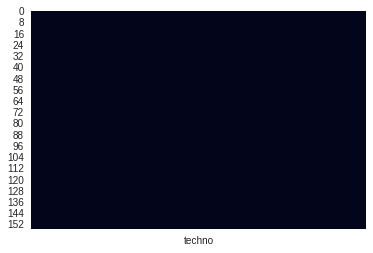

In [15]:
cat_data.isnull().sum().any()
sns.heatmap(cat_data.isna(),cbar=False)

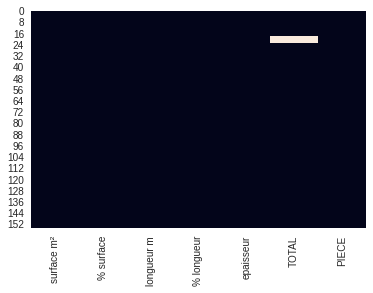

In [16]:
num_data.isnull().sum().any()
sns.heatmap(num_data.isna(),cbar=False)

In [17]:
num_data['TOTAL'].value_counts()

4350.0     4
4200.0     4
3750.0     4
9350.0     4
3500.0     4
          ..
16400.0    1
5880.0     1
6300.0     1
3437.0     1
7322.0     1
Name: TOTAL, Length: 105, dtype: int64

In [18]:
num_data.isnull().sum().any()

True

In [19]:
num_data['TOTAL'].value_counts()

4350.0     4
4200.0     4
3750.0     4
9350.0     4
3500.0     4
          ..
16400.0    1
5880.0     1
6300.0     1
3437.0     1
7322.0     1
Name: TOTAL, Length: 105, dtype: int64

In [20]:
cat_data.isnull().sum().any()

False

In [21]:
df['TOTAL'].value_counts()

4350.0     4
4200.0     4
3750.0     4
9350.0     4
3500.0     4
          ..
16400.0    1
5880.0     1
6300.0     1
3437.0     1
7322.0     1
Name: TOTAL, Length: 105, dtype: int64

In [22]:
df['TOTAL'].value_counts()

4350.0     4
4200.0     4
3750.0     4
9350.0     4
3500.0     4
          ..
16400.0    1
5880.0     1
6300.0     1
3437.0     1
7322.0     1
Name: TOTAL, Length: 105, dtype: int64

In [23]:
#Pour les variables numérique on va remplacer la valeur manquante par la valeur précedente de la valeur manqute

num_data
num_data.fillna(method='bfill',inplace=True)
num_data.isnull().sum().any() 

False

In [24]:
#Les variables num 
var_num=['surface m²','% surface','longueur m','% longueur','epaisseur','TOTAL','PIECE']

In [25]:
#Analyse univariée 
df['PIECE'].value_counts()

47.00     3
24.36     3
27.36     3
60.00     3
28.80     3
         ..
32.00     1
38.00     1
28.00     1
513.60    1
449.00    1
Name: PIECE, Length: 121, dtype: int64

In [26]:
df['PIECE'].value_counts(normalize=True)*100

47.00     1.935484
24.36     1.935484
27.36     1.935484
60.00     1.935484
28.80     1.935484
            ...   
32.00     0.645161
38.00     0.645161
28.00     0.645161
513.60    0.645161
449.00    0.645161
Name: PIECE, Length: 121, dtype: float64

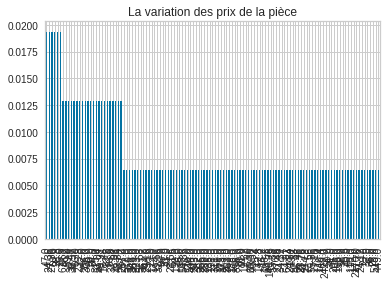

In [27]:
df['PIECE'].value_counts(normalize=True).plot.bar(title='La variation des prix de la pièce')

In [28]:
df['techno'].value_counts()

THERMO         111
RTM GELCOAT     26
CONTACT         18
Name: techno, dtype: int64

In [29]:
df['techno'].value_counts(normalize=True)*100

THERMO         71.612903
RTM GELCOAT    16.774194
CONTACT        11.612903
Name: techno, dtype: float64

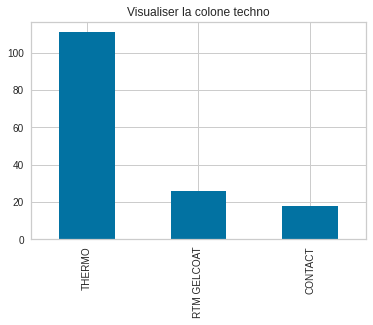

In [30]:
df['techno'].value_counts().plot.bar(title='Visualiser la colone techno')

In [31]:
#Variable numériques
df[var_num].describe()

,surface m²,% surface,longueur m,% longueur,epaisseur,TOTAL,PIECE
count,155.000000,1.550000e+02,155.000000,1.550000e+02,155.000000,150.000000,155.000000
mean,0.920658,1.000000e-01,6.035813,1.000000e-01,3.619355,8874.953333,148.392387
std,0.891291,2.645327e-16,4.749915,2.645327e-16,0.522494,12955.155576,281.425426
min,0.017000,1.000000e-01,0.760000,1.000000e-01,2.000000,660.000000,13.200000
25%,0.400000,1.000000e-01,3.200000,1.000000e-01,3.000000,3635.000000,37.680000
50%,0.650000,1.000000e-01,4.800000,1.000000e-01,4.000000,5776.500000,63.550000
75%,1.040000,1.000000e-01,7.350000,1.000000e-01,4.000000,9350.000000,168.500000
max,4.660000,1.000000e-01,37.520000,1.000000e-01,5.000000,119800.000000,2422.000000


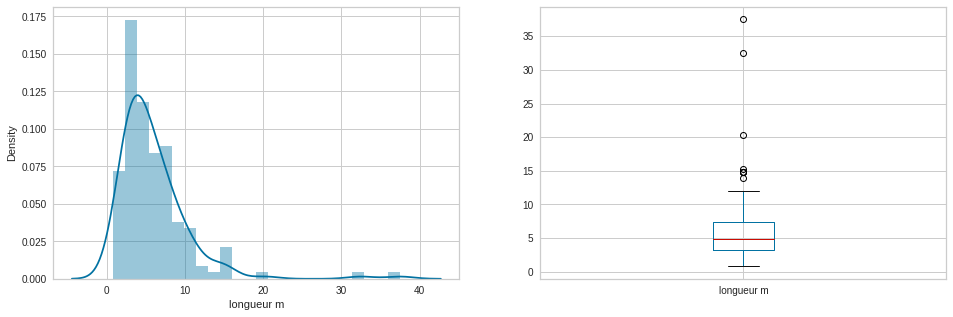

In [32]:
# La longuer en m² 
plt.figure(1)
plt.subplot(121)
sns.distplot(df['longueur m'])
plt.subplot(122)

df['longueur m'].plot.box(figsize=(16,5))
plt.suptitle('')
plt.show()


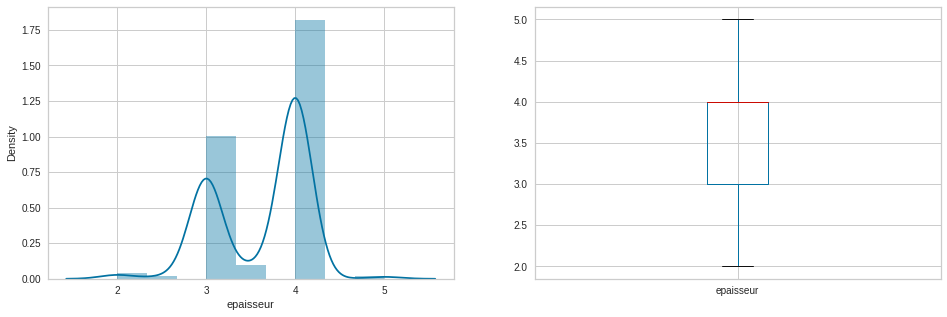

In [33]:
# Epaisseur
plt.figure(1)
plt.subplot(121)
sns.distplot(df['epaisseur'])
plt.subplot(122)

df['epaisseur'].plot.box(figsize=(16,5))
plt.suptitle('')
plt.show()


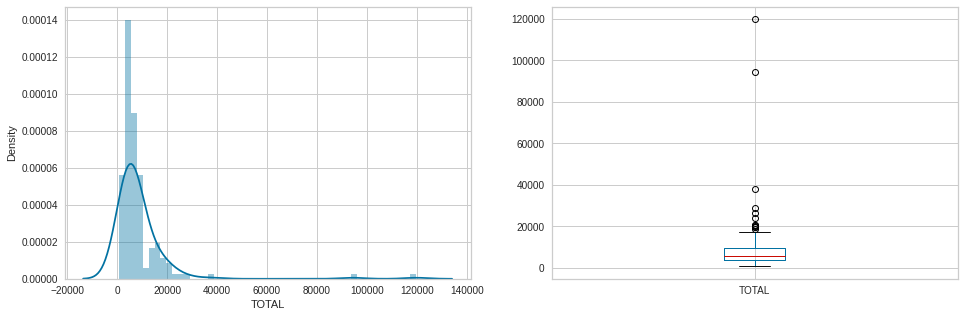

In [34]:
# Le TOTAL
plt.figure(1)
plt.subplot(121)
sns.distplot(df['TOTAL'])
plt.subplot(122)

df['TOTAL'].plot.box(figsize=(16,5))
plt.suptitle('')
plt.show()


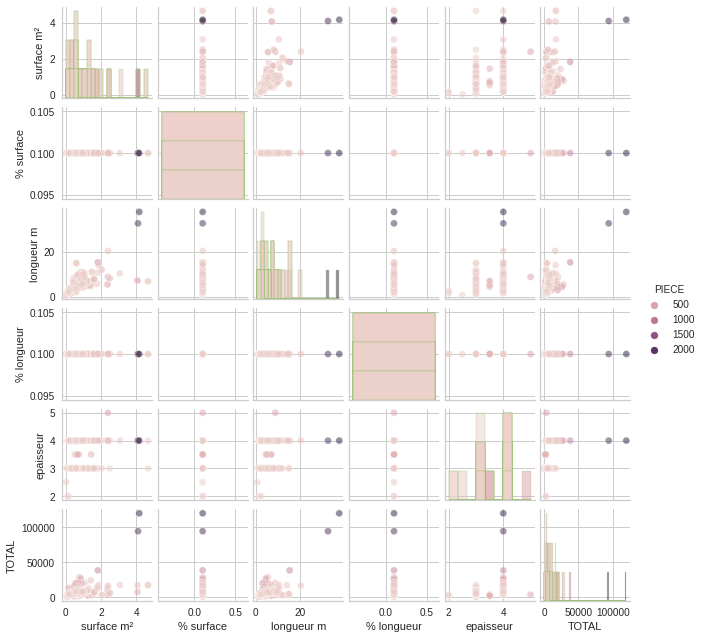

In [35]:
# Nuages ​​de points pour rechercher des relations et des histogrammes linéaires et non linéaires
sns.pairplot(df, diag_kind='hist',  hue= 'PIECE', height=1.5, 
             diag_kws={"edgecolor":"G", "alpha":0.5},
             plot_kws={"alpha":0.5})

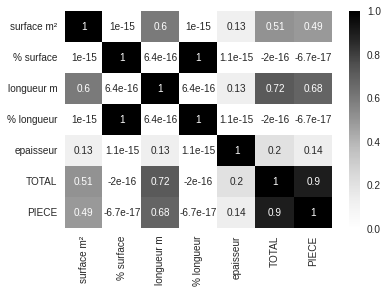

In [36]:
#matrice de corrélation
sns.heatmap(df.corr(method='pearson'), cmap="Greys", annot=True)

In [37]:
df

,techno,surface m²,% surface,longueur m,% longueur,epaisseur,TOTAL,PIECE
0,CONTACT,4.07,0.1,7.22,0.1,4.0,7322.0,449.0
1,CONTACT,2.37,0.1,5.50,0.1,4.0,8897.0,315.0
2,CONTACT,0.05,0.1,1.15,0.1,3.0,1000.0,56.0
3,CONTACT,2.39,0.1,8.80,0.1,5.0,3437.0,544.0
4,CONTACT,1.44,0.1,6.70,0.1,3.5,3162.0,406.0
...,...,...,...,...,...,...,...,...
150,THERMO,0.55,0.1,3.67,0.1,4.0,7638.0,47.0
151,THERMO,0.20,0.1,3.04,0.1,4.0,5334.0,38.0
152,THERMO,0.16,0.1,2.18,0.1,4.0,3281.0,28.0
153,THERMO,0.90,0.1,5.20,0.1,4.0,7137.0,77.0


**Création d'un modèle**

In [38]:
df_cat=cat_data

In [39]:
cat_data

,techno
0,CONTACT
1,CONTACT
2,CONTACT
3,CONTACT
4,CONTACT
...,...
150,THERMO
151,THERMO
152,THERMO
153,THERMO


In [40]:
df_cat

,techno
0,CONTACT
1,CONTACT
2,CONTACT
3,CONTACT
4,CONTACT
...,...
150,THERMO
151,THERMO
152,THERMO
153,THERMO


In [41]:
#Remplacer les valeurs catégorique par les valeurs numériques
df_cat=pd.get_dummies(df_cat,drop_first=True)
df_cat

,techno_RTM GELCOAT,techno_THERMO
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
150,0,1
151,0,1
152,0,1
153,0,1


In [42]:
num_data

,surface m²,% surface,longueur m,% longueur,epaisseur,TOTAL,PIECE
0,4.07,0.1,7.22,0.1,4.0,7322.0,449.0
1,2.37,0.1,5.50,0.1,4.0,8897.0,315.0
2,0.05,0.1,1.15,0.1,3.0,1000.0,56.0
3,2.39,0.1,8.80,0.1,5.0,3437.0,544.0
4,1.44,0.1,6.70,0.1,3.5,3162.0,406.0
...,...,...,...,...,...,...,...
150,0.55,0.1,3.67,0.1,4.0,7638.0,47.0
151,0.20,0.1,3.04,0.1,4.0,5334.0,38.0
152,0.16,0.1,2.18,0.1,4.0,3281.0,28.0
153,0.90,0.1,5.20,0.1,4.0,7137.0,77.0


In [43]:
#Concatiner les num_data avec df_cat
df_encoded=pd.concat([df_cat,num_data],axis=1)

In [44]:
df_encoded

,techno_RTM GELCOAT,techno_THERMO,surface m²,% surface,longueur m,% longueur,epaisseur,TOTAL,PIECE
0,0,0,4.07,0.1,7.22,0.1,4.0,7322.0,449.0
1,0,0,2.37,0.1,5.50,0.1,4.0,8897.0,315.0
2,0,0,0.05,0.1,1.15,0.1,3.0,1000.0,56.0
3,0,0,2.39,0.1,8.80,0.1,5.0,3437.0,544.0
4,0,0,1.44,0.1,6.70,0.1,3.5,3162.0,406.0
...,...,...,...,...,...,...,...,...,...
150,0,1,0.55,0.1,3.67,0.1,4.0,7638.0,47.0
151,0,1,0.20,0.1,3.04,0.1,4.0,5334.0,38.0
152,0,1,0.16,0.1,2.18,0.1,4.0,3281.0,28.0
153,0,1,0.90,0.1,5.20,0.1,4.0,7137.0,77.0


In [45]:
#Mettre la variable target (PIECE ) a part
y=df_encoded['PIECE']
y

0      449.0
1      315.0
2       56.0
3      544.0
4      406.0
       ...  
150     47.0
151     38.0
152     28.0
153     77.0
154     62.0
Name: PIECE, Length: 155, dtype: float64

In [46]:
X=df_encoded.drop('PIECE',axis=1)

In [47]:
X

,techno_RTM GELCOAT,techno_THERMO,surface m²,% surface,longueur m,% longueur,epaisseur,TOTAL
0,0,0,4.07,0.1,7.22,0.1,4.0,7322.0
1,0,0,2.37,0.1,5.50,0.1,4.0,8897.0
2,0,0,0.05,0.1,1.15,0.1,3.0,1000.0
3,0,0,2.39,0.1,8.80,0.1,5.0,3437.0
4,0,0,1.44,0.1,6.70,0.1,3.5,3162.0
...,...,...,...,...,...,...,...,...
150,0,1,0.55,0.1,3.67,0.1,4.0,7638.0
151,0,1,0.20,0.1,3.04,0.1,4.0,5334.0
152,0,1,0.16,0.1,2.18,0.1,4.0,3281.0
153,0,1,0.90,0.1,5.20,0.1,4.0,7137.0


In [48]:
# Spécifier la partie test et la partie train 
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=6)

In [49]:
#Instancier le modele 
clf=LogisticRegression()


In [51]:
y_train=y_train.astype('int')
y_test=y_test.astype('int')

 


In [86]:
x_train.shape, y_train.shape, x_test.shape

((124, 8), (124,), (31, 8))

In [52]:
clf=LogisticRegression()
clf.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [53]:
pred=clf.predict(x_test)

In [62]:
pred

array([ 28,  63,  27,  27,  28,  28,  28,  67,  49, 315,  63,  28,  49,
        28,  28,  63,  28,  28,  28,  27, 286, 315, 315,  27,  27,  67,
        67,  63,  28, 896, 896])

In [55]:
y_test

71       37
4       406
140      89
102      23
2        56
45       19
139      40
88       29
64       53
104      41
59       69
72       24
55       47
131      50
118      22
83       82
126      46
81       32
107      18
52       23
39      343
98       38
23      273
44       25
30      190
0       449
121      51
74       67
89       34
37     2422
32     2170
Name: PIECE, dtype: int64

In [56]:
accuracy_score(y_test,pred)

0.0

In [63]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
Y_pred = logreg.predict(x_test)
acc_log = round(logreg.score(x_train, y_train) * 100, 2)
acc_log

14.52

In [71]:
# Support Vector Machines

svc = SVC()
svc.fit(x_train, y_train)
Y_pred = svc.predict(x_test)
acc_svc = round(svc.score(x_train, y_train) * 100, 5)
acc_svc

9.67742

In [82]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(x_train, y_train)
Y_pred = knn.predict(x_train)
acc_knn = round(knn.score(x_train, y_train) * 100, 25)
acc_knn

99.19354838709677

In [85]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
Y_pred = gaussian.predict(x_test)
acc_gaussian = round(gaussian.score(x_train, y_train) * 100, 2)
acc_gaussian


82.26

In [91]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(x_train, y_train)
Y_pred = perceptron.predict(x_test)
acc_perceptron = round(perceptron.score(x_train, y_train) * 100, 2)
acc_perceptron

0.81

In [94]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(x_train, y_train)
Y_pred = linear_svc.predict(x_test)
acc_linear_svc = round(linear_svc.score(x_train, y_train) * 100, 2)
acc_linear_svc

1.61

In [97]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(x_train, y_train)
Y_pred = sgd.predict(x_test)
acc_sgd = round(sgd.score(x_train, y_train) * 100, 2)
acc_sgd

0.81

In [100]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)
Y_pred = decision_tree.predict(x_test)
acc_decision_tree = round(decision_tree.score(x_train, y_train) * 100, 2)
acc_decision_tree

99.19

In [101]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train, y_train)
Y_pred = random_forest.predict(x_test)
random_forest.score(x_train, y_train)
acc_random_forest = round(random_forest.score(x_train, y_train) * 100, 2)
acc_random_forest

99.19

In [102]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
1,KNN,99.193548
3,Random Forest,99.190000
8,Decision Tree,99.190000
4,Naive Bayes,82.260000
2,Logistic Regression,14.520000
0,Support Vector Machines,9.677420
7,Linear SVC,1.610000
5,Perceptron,0.810000
6,Stochastic Gradient Decent,0.810000
